### MGT-502 Final Project
# 
## Exploratory Data Analysis (EDA)
__Nadège Baertschi & Zélia Décaillet__

_May 2025_

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Github repository URL
repo_url = "https://raw.githubusercontent.com/baertsch/MGT-502-ML-Project/main/"

# Load datasets
interactions_df = pd.read_csv(repo_url + "kaggle_data/interactions_train.csv")
interactions_df.rename(columns={"u": "user_id"}, inplace=True)

# Orginal items csv with a lot of missing data
items_df = pd.read_csv(repo_url + "kaggle_data/items.csv")

# Display
display(interactions_df.head())
display(items_df.head())

,user_id,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


## Let's explore the data provided by Kaggle

In [7]:
n_users = interactions_df["user_id"].nunique()
n_items = items_df['i'].nunique()
print(f"Number of users in the dataset: {n_users}")
print(f"Number of items in the dataset: {n_items}")

Number of users in the dataset: 7838
Number of items in the dataset: 15291


### Let's see how the number of interactions per user is distributed

Average number of interactions per user: 11.11
Minimum number of interactions per user: 3
Maximum number of interactions per user: 385
Median number of interactions per user: 6.00


Text(0, 0.5, 'Frequency')

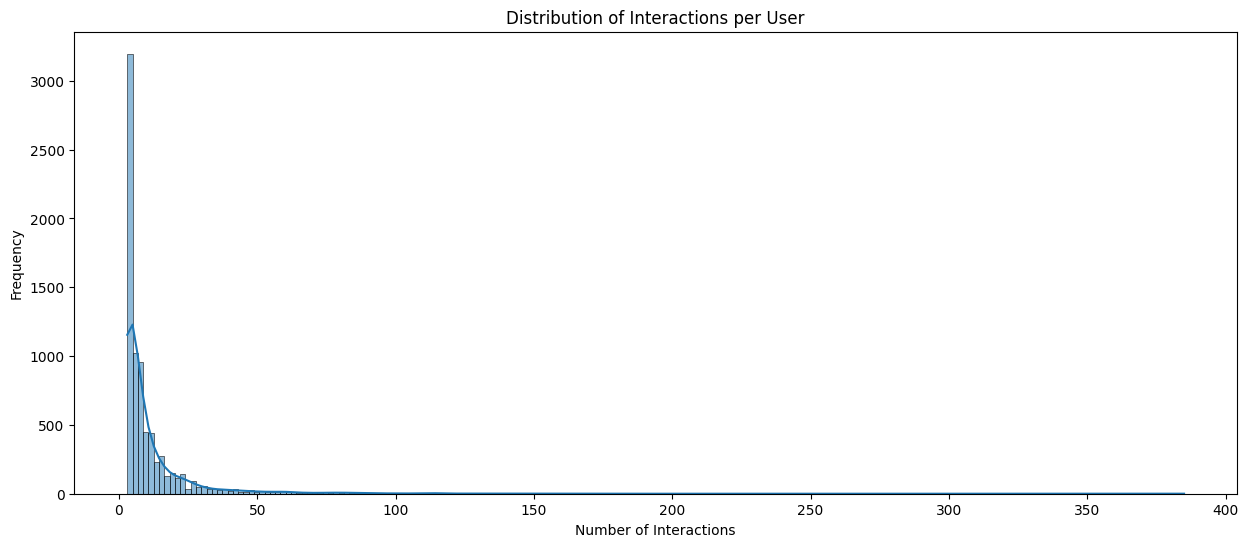

In [13]:
interactions_per_user = interactions_df.groupby('user_id').size()
print(f"Average number of interactions per user: {interactions_per_user.mean():.2f}")
print(f"Minimum number of interactions per user: {interactions_per_user.min()}")
print(f"Maximum number of interactions per user: {interactions_per_user.max()}")
print(f"Median number of interactions per user: {interactions_per_user.median():.2f}")
# Plot distribution of interactions per user
plt.figure(figsize=(15, 6))
sns.histplot(interactions_per_user, bins=200, kde=True)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')

In [ ]:
def create_data_matrix1(data, n_users, n_items):
    """
    This function creates a data matrix with binary values for the interactions, 1 is interaction and 0 is no interaction.
    The data matrix is of shape (n_users, n_items). 
    """
    data_matrix = np.zeros((n_users, n_items))
    data_matrix[data['user_id'].values, data['i'].values] = 1
    return data_matrix

In [ ]:
def plot_heatmap1(data_matrix, last_row=50,last_column=50, title="Interaction Heatmap", label={'label':'Interaction (1 = Positive, 0 = None)'}
                  xlabel='Item ID', ylabel='User ID'):
    """
    This function plots a heatmap of a matrix.
    """
    matrix_subset = data_matrix[:last_row, :last_column]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap='YlGnBu', cbar=True,cbar_kws=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylbael)
    plt.show()